In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [6]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding='latin-1')

In [7]:
df.head(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [8]:
df.shape

(4194, 181)

In [10]:
df.corr()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
Customers.id,1.000000,0.951397,NaN,0.087253,NaN,-0.639947,1.0,NaN,NaN,NaN,0.891923,0.363692,0.931931,1.000000,0.515002,0.571197,NaN,-0.032623,-0.040149,-0.004721,0.657639,0.105056,NaN,NaN,0.044152,0.057158,-0.037907,0.187999,NaN,NaN,-1.0,-0.088350,0.885575,-0.046010,NaN,NaN,0.168347,0.885630,0.906843,0.886407,NaN,NaN,NaN,NaN,NaN,-0.102061,0.320346,0.931643,0.931931,0.399430,...,NaN,0.044151,0.396045,0.071312,NaN,0.294253,0.315419,NaN,-0.054290,-0.058560,-0.148926,-0.058923,-0.051465,-0.071350,NaN,-0.193089,-0.214644,-0.231730,-0.003188,NaN,-0.140056,NaN,NaN,NaN,-0.015171,NaN,NaN,NaN,NaN,NaN,NaN,-0.250860,0.024404,-0.274770,0.016610,0.007382,NaN,0.129465,-0.012930,-0.075404,-0.018854,NaN,-0.158864,-0.144105,-0.151182,-0.098889,-0.282855,NaN,0.055784,NaN
Customers.create_date,0.951397,1.000000,NaN,0.094404,NaN,-0.612277,1.0,NaN,NaN,NaN,0.883490,0.330749,0.891490,0.951397,0.460924,0.408765,NaN,-0.012880,-0.034733,-0.017057,0.671558,0.112978,NaN,NaN,0.053137,0.025668,-0.016653,0.185037,NaN,NaN,-1.0,-0.043323,0.936341,-0.025055,NaN,NaN,0.123481,0.936910,0.839279,0.935092,NaN,NaN,NaN,NaN,NaN,-0.039971,0.294274,0.896279,0.891490,0.384278,...,NaN,0.063760,0.382064,0.060735,NaN,0.268168,0.280648,NaN,-0.044928,-0.047666,-0.154201,-0.046971,-0.047779,-0.077668,NaN,-0.187662,-0.198281,-0.218402,-0.003190,NaN,-0.141576,NaN,NaN,NaN,-0.018182,NaN,NaN,NaN,NaN,NaN,NaN,-0.232475,0.010814,-0.275290,0.002708,0.023598,NaN,0.138321,-0.028929,-0.081397,-0.000640,NaN,-0.141344,-0.139152,-0.148081,-0.112419,-0.267895,NaN,0.044648,NaN
Customers.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customers.mailing,0.087253,0.094404,NaN,1.000000,NaN,0.408248,NaN,NaN,NaN,NaN,0.043437,0.027438,0.09

In [11]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [12]:
df_total_data=pd.DataFrame(df.isnull().sum()) 
df_total_data 

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
...,...
Products.leg_style,4194
Products.seat_size,4032
Products.family_id,325
Products.saved_status,264


In [14]:
df1=df_total_data[df_total_data[0]>1000] 

In [15]:
df1

,0
Customers.company,3467
Customers.status,4093
Customers.mailing,2080
Customers.reminders,4194
Customers.tax_exempt,4189
...,...
Products.material,3392
Products.arm_style,4039
Products.leg_style,4194
Products.seat_size,4032


In [16]:
df1.isnull().sum()

0    0
dtype: int64

In [17]:
for i in df1.index:
    df.drop(i,axis=1,inplace=True)

In [20]:
pd.DataFrame(df.isnull().sum()).head(15)

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,423
Orders.id,0
Orders.customer_id,0
Orders.fname,0
Orders.lname,0


In [22]:
df.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.create_date         0
Customers.last_modified       0
                           ... 
Products.shipping_length    196
Products.shipping_width     196
Products.shipping_height    196
Products.family_id          325
Products.saved_status       264
Length: 67, dtype: int64

In [23]:
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [24]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [25]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.create_date       0
Customers.last_modified     0
                           ..
Products.shipping_length    0
Products.shipping_width     0
Products.shipping_height    0
Products.family_id          0
Products.saved_status       0
Length: 67, dtype: int64

In [26]:
x=pd.get_dummies(df,drop_first=True)

In [29]:
model=KMeans(n_clusters=4)

In [30]:
model=model.fit(x)

In [31]:
tahmin=model.predict(x)

In [32]:
tahmin

array([3, 0, 3, ..., 2, 2, 2])

In [33]:
x["cluster"]=tahmin

In [34]:
x.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_flags,Products.qb_edit_sequence,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,Customers.fname_A.J.,Customers.fname_ACCOUNTS,Customers.fname_AKOSSIWA,Customers.fname_ALEEN,Customers.fname_ALFRED,Customers.fname_ALICE,Customers.fname_ALVIN,Customers.fname_ANDREA,Customers.fname_ANDREW,Customers.fname_ANDY R,Customers.fname_ANGELA,Customers.fname_ANITA,...,Products.family_id_WA35,Products.family_id_WA37,Products.family_id_WA38,Products.family_id_WA40,Products.family_id_WA42,Products.family_id_WA43,Products.family_id_WC12,Products.family_id_WC13,Products.family_id_WC14,Products.family_id_WC17,Products.family_id_WC2,Products.family_id_WC22,Products.family_id_WC23,Products.family_id_WC24,Products.family_id_WC26,Products.family_id_WC27,Products.family_id_WC38,Products.family_id_WC39,Products.family_id_WC4,Products.family_id_WC40,Products.family_id_WC46,Products.family_id_WC49,Products.family_id_WC50,Products.family_id_WC6,Products.family_id_WZ1,Products.family_id_WZ28,Products.family_id_WZ31,Products.family_id_WZ43,Products.family_id_WZ56,Products.family_id_WZ58,Products.family_id_WZ70,Products.family_id_WZ71,Products.family_id_WZ72,Products.family_id_WZ73,Products.family_id_WZ74,Products.family_id_WZ76,Products.family_id_WZ77,Products.family_id_WZ81,Products.family_id_WZ85,Products.family_id_WZ86,Products.family_id_WZ87,Products.family_id_WZ88,Products.family_id_WZ89,Products.family_id_WZ91,Products.family_id_WZ92,Products.family_id_WZ96,Products.family_id_Wall mat hanger,Products.family_id_the Adjustable CuffÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Variable Weights,Products.family_id_the CuffÌÄ®ÕÌ¢âÂÁÌÄÛ_Ìâå¨ Weights,cluster
0,797,1426018724,1437764306,0.0,3758,797,57.20,0.000000,9.95,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,44.00,1.463163e+09,62.0,1.450325e+09,24.80,7.50,30.40,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,3,1386089139,1437764354,0.0,23,3,20.00,0.800838,9.99,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,1.87,1.462370e+09,62.0,1.450322e+09,8.00,7.00,1.50,0.876336,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1386089139,1437764354,0.0,9531,3,68.78,0.000000,9.95,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.0,11655,9531,1.0,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,52.50,1.463163e+09,62.0,1.450321e+09,13.23,10.04,10.24,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,4,1386780263,1437762646,0.0,29,4,19.56,0.000000,9.95,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,12.62,1.462595e+09,62.0,1.450323e+09,10.60,7.80,18.50,0.876336,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1386861599,1437764316,0.0,30,5,36.05,0.800838,9.95,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.0,40,30,991.0,1,36.05,25.75,991.0,1.0,1.0,3.0,50.47,36.05,25.75,1.462370e+09,62.0,1.450323e+09,8.

In [35]:
silhouette_score(x,tahmin)

0.4929584689829877

In [36]:
allscore=[]
allclusters=[]
uzaklıklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklık=model.inertia_
        print(" Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzaklıklar.append(uzaklık)
clust(10)

 Cluster  2  score  0.6285252292108297
 Cluster  3  score  0.5633842460114455
 Cluster  4  score  0.49230292689467664
 Cluster  5  score  0.48384390448359377
 Cluster  6  score  0.5036160414577369
 Cluster  7  score  0.461977719102121
 Cluster  8  score  0.5078981002363663
 Cluster  9  score  0.5008062825857209
 Cluster  10  score  0.48286726595551777
 Cluster  11  score  0.4889645984410942


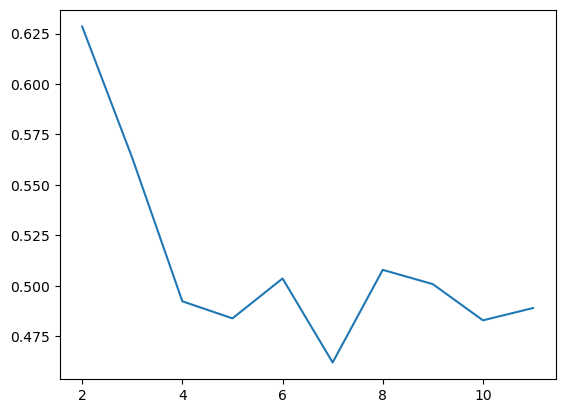

In [37]:
plt.plot(allclusters,allscore)